In [3]:
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import freud.box
from freud import parallel, box, density
import random
parallel.setNumThreads(4)
%matplotlib inline

In [117]:
rdf = density.RDF(rmax=2.0, dr=0.025)
fbox = freud.box.Box.square(L=4.0)
sample_data = xlrd.open_workbook('M107 RDS.xlsx')
for i in range(1):
    sheet = sample_data.sheet_by_index(i)
    coordinate_array = [[sheet.cell_value(r,c) for c in range(sheet.ncols)] for r in range(sheet.nrows)]
    coordinates = np.array(coordinate_array)
    rdf.accumulate(fbox, coordinates, coordinates)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FreudDeprecationWarning: The getR function is deprecated in favor of the R class attribute and will be removed in a future version of freud.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FreudDeprecationWarning: The getRDF function is deprecated in favor of the RDF class attribute and will be removed in a future version of freud.
  import sys


0.06333334 19.817719


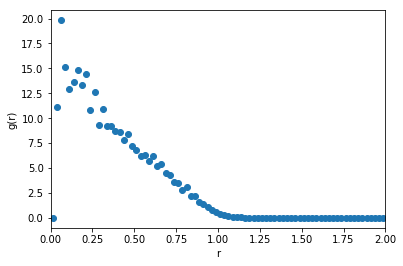

In [118]:
# Create RDF object setting max distance (half a box lenght) and bin 'width'
# Calculate RDF with box + points
rdf.compute(fbox, coordinates, coordinates)
# get the center of the histogram bins
r = rdf.getR()
# get the value of the histogram bins
y = rdf.getRDF()
# plot
plt.scatter(r, y)
plt.ylabel("g(r)")
plt.xlabel("r")
plt.xlim(0,2)
max_y = max(y)
max_r = r[y.argmax()]
print(max_r, max_y)

In [135]:
print(r)
print(y)


[0.01666667 0.03888889 0.06333334 0.08809523 0.11296298 0.1378788
 0.16282053 0.18777773 0.21274514 0.2377193  0.26269844 0.28768122
 0.3126666  0.33765444 0.3626436  0.3876343  0.41262636 0.43761918
 0.46261263 0.48760682 0.5126017  0.537597   0.5625925  0.58758885
 0.6125849  0.6375815  0.66257906 0.6875759  0.71257293 0.7375706
 0.7625687  0.7875653  0.8125645  0.837562   0.86256075 0.8875589
 0.9125572  0.9375555  0.96255374 0.9875532  1.0125517  1.0375501
 1.0625492  1.0875481  1.1125466  1.1375458  1.1625447  1.1875448
 1.2125424  1.237542   1.262541   1.2875398  1.3125402  1.3375401
 1.3625375  1.3875388  1.4125371  1.4375353  1.4625355  1.4875349
 1.5125339  1.5375359  1.5625327  1.5875304  1.6125344  1.6375314
 1.6625317  1.6875298  1.7125313  1.7375306  1.7625275  1.7875319
 1.8125306  1.8375269  1.8625274  1.887528   1.9125266  1.937526
 1.9625283  1.9875259 ]
[0.00000000e+00 1.11257372e+01 1.98177185e+01 1.51240463e+01
 1.29220819e+01 1.36543102e+01 1.48432341e+01 1.3281342